In [67]:
!pip install matplotlib seaborn pandas numpy 


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [95]:
df = pd.read_csv('7edge.csv')

In [96]:
df.info()
df['Branch'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sr.No.               179 non-null    int64  
 1   Full Name            179 non-null    object 
 2   Email id             179 non-null    object 
 3   Contact Number       179 non-null    int64  
 4   USN                  179 non-null    object 
 5   Branch               179 non-null    object 
 6   10th%                179 non-null    object 
 7   12th%                177 non-null    object 
 8   Diploma%             121 non-null    object 
 9   BE%                  179 non-null    object 
 10  B.E CGPA             179 non-null    float64
 11  Roles applying for?  179 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 16.9+ KB


61

In [97]:
df = df.dropna(subset='12th%')

In [98]:
df['Branch'] = df.Branch.str.lower()
for i, row in df.iterrows():
    if row['Roles applying for?'].__contains__('Analyst'):
        df.loc[i, 'Analyst'] = True
    if row['Branch'].__contains__('data') or row['Branch'].__contains__('ds'):
        df.loc[i, 'Branch'] = 'Data Science'
    elif row['Branch'].__contains__('elec') or row['Branch'].__contains__('ec'):
        df.loc[i, 'Branch'] = 'EC'
    elif row['Branch'].__contains__('info') or row['Branch'].__contains__('ise'):
        df.loc[i, 'Branch'] = 'ISE'
    elif row['Branch'].__contains__('ai') or row['Branch'].__contains__('ml'):
        df.loc[i, 'Branch'] = 'AIML'
    elif row['Branch'].__contains__('cse') or row['Branch'].__contains__('comp') or row['Branch'].__contains__('cs'):
        df.loc[i, 'Branch'] = 'CSE'

df['Branch'].unique()

/tmp/ipykernel_10174/2469173695.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'Analyst'] = True


array(['AIML', 'CSE', 'Data Science', 'EC', 'ISE'], dtype=object)

In [100]:
df['Analyst'] = df.Analyst.fillna(False)
df['Analyst'].value_counts()

Analyst
False    160
True      17
Name: count, dtype: int64

In [101]:
sns.set_style('dark')
sns.set_palette('husl')

In [102]:
# df['Branch'] = df['Branch'].str.lower().str.strip().str.replace('&','and').str.replace('computer science','cse').str.replace('data science','ds').str.replace('( ',' (').str.replace('ai&ml','aiml').str.replace('-',' ').str.replace('electronicse','electronics').str.replace('enginnering','engineering').str.replace('and','').str.replace('engineering','').str.replace('csee','cse').str.replace('communications','communication').str.replace('information science','ise').str.replace('electronics communication','ec').str.replace('ece','ec').str.replace('electronics  communication','ec').str.replace('cse ds','cse (ds)').str.replace('cse(aiml)','aiml').str.replace('cse aiml','aiml').str.replace('cse(ds)','cse (ds)').str.replace('cse (ds)','ds').str.replace('cse  aiml','aiml').str.replace('cse','cs').str.strip()
# df['Branch'].unique()

In [127]:
df['ML Branch'] = df['Branch'] == 'AIML'

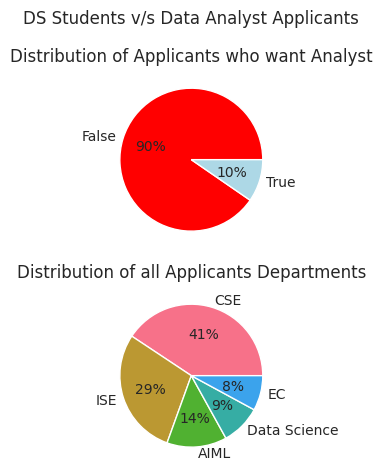

In [153]:
fig, ax = plt.subplots(2,1)

ax[0].pie(df['Analyst'].value_counts().values, labels=df['Analyst'].value_counts().index, autopct="%.f%%", colors=['red', 'lightblue'])
ax[1].pie(df['Branch'].value_counts().values, labels=df['Branch'].value_counts().index, autopct="%.f%%")
ax[0].set_title('Distribution of Applicants who want Analyst')
ax[1].set_title('Distribution of all Applicants Departments')

plt.suptitle('DS Students v/s Data Analyst Applicants') 
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of Applicants are ML Students')

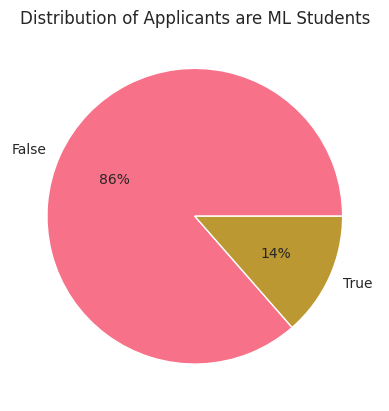

In [157]:
plt.pie(df['ML Branch'].value_counts().values, labels=df['ML Branch'].value_counts().index, autopct="%.f%%")
plt.title('Distribution of Applicants are ML Students')

In [174]:
sns.histplot(data=df.query('Branch == "CSE"'), x='CGPA')

ValueError: Could not interpret value `CGPA` for `x`. An entry with this name does not appear in `data`.

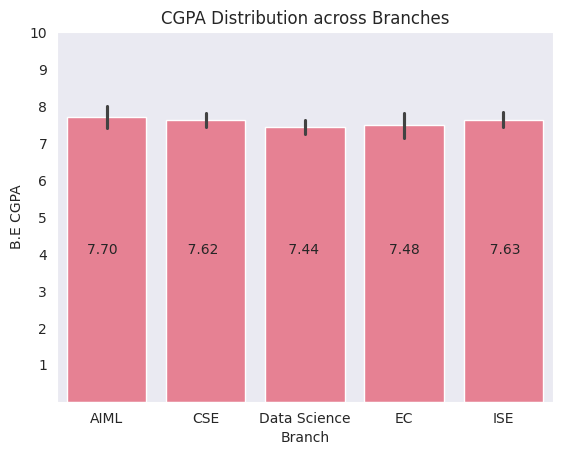

In [266]:
sns.barplot(data=df,x='Branch', y='B.E CGPA', width=0.8)
plt.annotate(xy=(-0.2,4),text='                '.join(str(value) for value in ["{:.2f}".format(number) for number in list(df.groupby(by='Branch')['B.E CGPA'].mean())]))
plt.title('CGPA Distribution across Branches')
plt.yticks(np.arange(1,11))
plt.show()

In [219]:
df.groupby(by='Branch')['B.E CGPA'].mean()

Branch
AIML            7.698000
CSE             7.623958
Data Science    7.440625
EC              7.475714
ISE             7.633843
Name: B.E CGPA, dtype: float64

In [216]:
df

,Sr.No.,Full Name,Email id,Contact Number,USN,Branch,10th%,12th%,Diploma%,BE%,B.E CGPA,Roles applying for?,Analyst,ML Branch
0,1,Manohara,manohar4693@gmail.com,8296267343,4SF20CI030,AIML,91.68,93,NaN,73.7,8.12,ML-Engineer,False,True
1,2,Mohammed Thanseer,thansheerbhr@gmail.com,8147872388,4SF20CI036,AIML,80.8,77.33,NaN,68,7.55,"ML Engineer I,Data Analyst I,Software Develope...",True,True
2,3,Sahil Kumar,sahilkumar.ktp16@gmail.com,7022334283,4SF20CI052,AIML,88,87.33,NaN,68.51,7.51,Data Analyst I,True,True
3,4,Thejas Rao,thejastanvi2.0@gmail.com,9380174402,4SF20CI062,AIML,80.8,81.66,NaN,71.10%,7.86,Data analyst,False,True
4,5,SHREYA K,kulalshreya80@gmail.com,9148676538,4SF20CS134,CSE,93.12,92.66,-,78,8.50,"Software development engineer 1 , Frontend",False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,175,Swasthi Shetty,swasthishetty2002@gmail.com,7619510091,4SF20IS048,ISE,79.2,73.667,-,59,6.60,Software Development Engineer in Test I,False,False
175,176,THANUSHREE S,tanushris585@gmail.com,9353516705,4SF20IS108,ISE,85.26,91,0,80.08,8.80,"Software Development Engineer I, Backend",False,False
176,177,Vibha K,vibhakrishnad@gmail.com,8197576482,4SF20IS113,ISE,91.36,91.66,0,70.53,7.80,Software developer engineering l Backend,False,False
177,178,VRAJ K RABARA,vrajrabara@gmail.com,8431412488,4sf20is116,ISE,84.5,89.5,NaN,77,8.45,"Software Development Engineer I, Frontend",False,False
